In [58]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import scipy.stats as stats
import numpy as np
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [59]:
melbourne_dataset_csv = pd.read_csv("https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv")

In [60]:
#show me the head of melbourne_dataset_csv and how rows are in total
melbourne_dataset_csv.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [61]:
print("rows:", len(melbourne_dataset_csv))

rows: 34857


In [62]:
#count null values in Price

null_price_p = melbourne_dataset_csv["Price"].isna().sum()
print(null_price_p)

7610


In [63]:
#type of property and percentage represents

type_p = melbourne_dataset_csv["Type"].value_counts()
print(type_p)

Type
h    23980
u     7297
t     3580
Name: count, dtype: int64


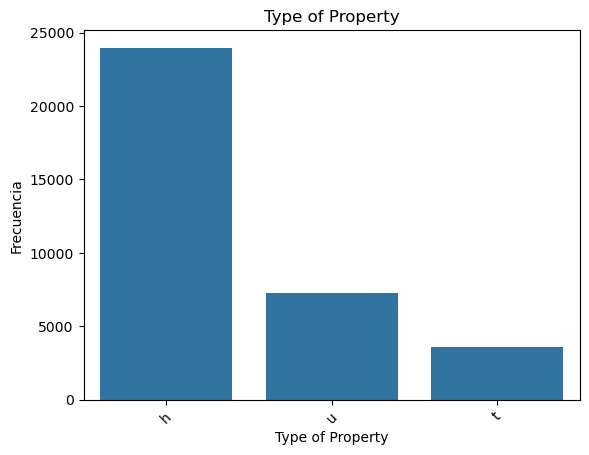

In [64]:
#grafico de barras para contear el tipo de propiedad
sns.countplot(data=melbourne_dataset_csv, x='Type')
plt.title('Type of Property')
plt.xlabel('Type of Property')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas si son largas
plt.show()

In [65]:
#grafico de barras para contear rooms y precio medio average price


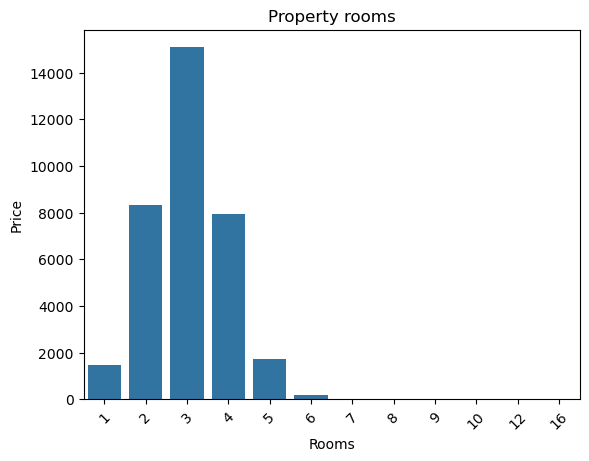

In [66]:
#grafico de barras para contear rooms y precio medio
sns.countplot(data=melbourne_dataset_csv, x='Rooms')
plt.title('Property rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rota las etiquetas si son largas
plt.show()

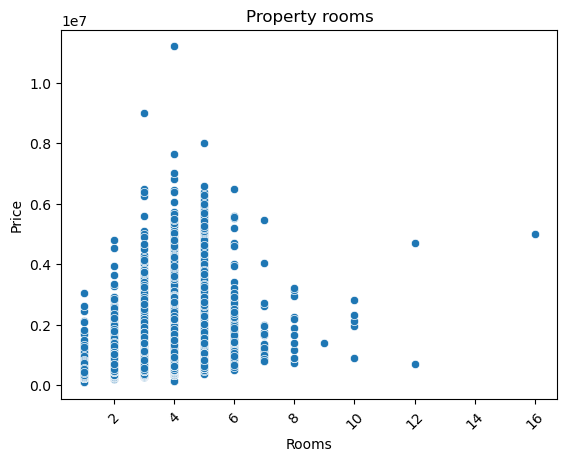

In [67]:
#spearman graphic correlation between rooms and price
sns.scatterplot(data=melbourne_dataset_csv, x='Rooms', y='Price')
plt.title('Property rooms')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rota las etiquetas si son largas
plt.show()



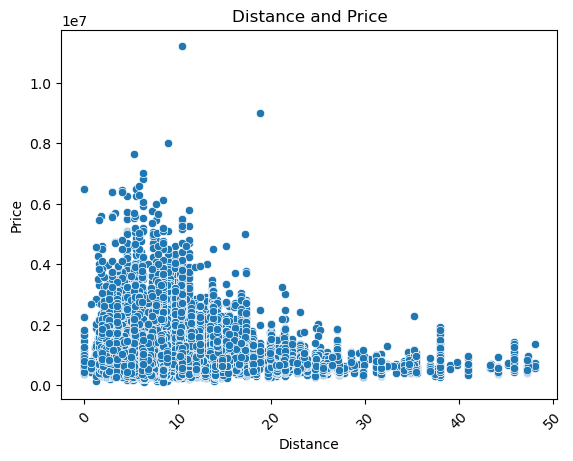

In [68]:
#scatter plot between Distance and price
sns.scatterplot(data=melbourne_dataset_csv, x='Distance', y='Price')
plt.title('Distance and Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rota las etiquetas si son largas
plt.show()

In [69]:
# Crear una copia del dataset original para mantener el DataFrame intacto
melbourne_dataset_landsize = melbourne_dataset_csv.copy()

# Contar valores nulos en Landsize
nulos_Landsize_df = melbourne_dataset_landsize["Landsize"].isna().sum()
print(f"Había {nulos_Landsize_df} filas con valores nulos que se han eliminado")

# Eliminar valores nulos en Landsize
melbourne_dataset_landsize = melbourne_dataset_landsize.dropna(subset=['Landsize'])

# Resetear el índice
melbourne_dataset_landsize = melbourne_dataset_landsize.reset_index(drop=True)


Había 11810 filas con valores nulos que se han eliminado


In [70]:
# Reemplazar valores nulos en Landsize con 0 (o el valor que prefieras)
melbourne_dataset_csv["Landsize"].fillna(0, inplace=True)

# Convertir Landsize a integer
melbourne_dataset_csv["Landsize"] = melbourne_dataset_csv["Landsize"].astype(int)


C:\Users\greta\AppData\Local\Temp\ipykernel_32364\3781210014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  melbourne_dataset_csv["Landsize"].fillna(0, inplace=True)


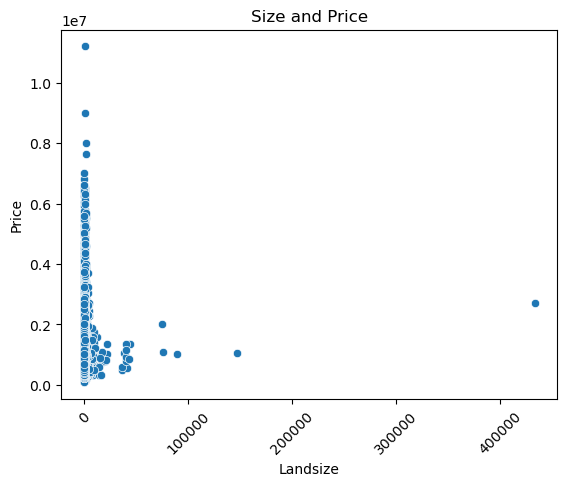

In [71]:
#scatter plot between Size and Price
sns.scatterplot(data=melbourne_dataset_csv, x='Landsize', y='Price')
plt.title('Size and Price')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rota las etiquetas si son largas
plt.show()

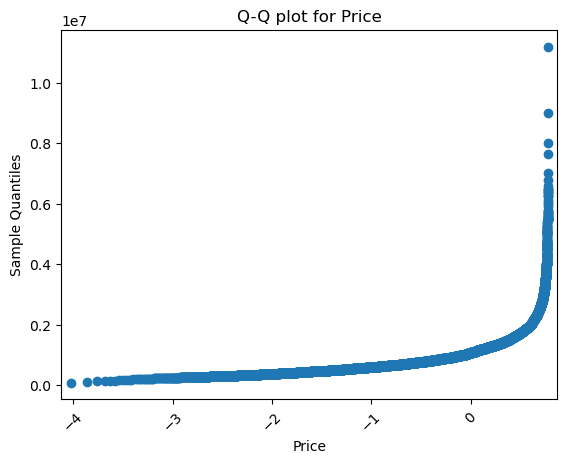

In [80]:
# Generar un Q-Q plot para 'Price' para verificar si sigue una distribución normal
sm.qqplot(melbourne_dataset_csv['Price'], line='s')  
plt.title('Q-Q plot for Price')
plt.xlabel('Price')
plt.ylabel('Sample Quantiles')
plt.xticks(rotation=45)  # Rotar las etiquetas si es necesario
plt.show()

<Axes: xlabel='Landsize'>

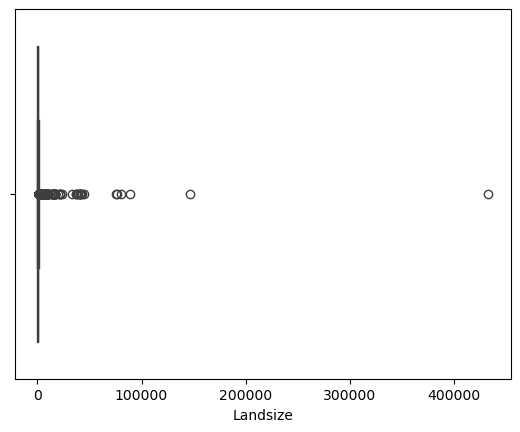

In [81]:
#boxplot con tukeys para limpiar outliers 
sns.boxplot(x=melbourne_dataset_csv["Landsize"])

In [93]:
# Define a function for Tukey's Test for Outliers
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)  # First quartile
    Q3 = data.quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers


In [97]:
# Apply Tukey's method to identify outliers
outliers = tukeys_test_outliers(melbourne_dataset_csv['Price'])
# Create a new DataFrame with outliers
outliers_df =  melbourne_dataset_csv[melbourne_dataset_csv['Price'].isin(outliers)]
# Display the outliers
print("Identified Outliers:")
print(outliers_df)

Identified Outliers:
               Suburb                Address  Rooms Type      Price Method  \
135       Albert Park   112 Beaconsfield Pde      3    h  2850000.0     PI   
142       Albert Park      104 Richardson St      4    h  2300000.0      S   
146       Albert Park        114 Victoria Av      3    h  2485000.0      S   
152       Albert Park            2 Dundas Pl      3    h  2615000.0      S   
158       Albert Park          70 Barrett St      3    h  2575000.0      S   
...               ...                    ...    ...  ...        ...    ...   
34619  Port Melbourne           142 Beach St      4    h  2300000.0     PI   
34623  Port Melbourne  1/29 Beaconsfield Pde      3    u  2610000.0      S   
34632         Prahran           61 Murray St      3    h  2500000.0     VB   
34714     South Yarra             54 Oban St      3    h  2855000.0     PI   
34719       Southbank    611/250 St Kilda Rd      3    u  2685000.0      S   

            SellerG        Date  Distance 

In [99]:
# Calculate the percentage of properties that are outliers
total_properties = melbourne_dataset_csv.shape[0]  # Total number of properties
number_of_outliers = outliers_df.shape[0]  # Number of outliers
percentage_outliers = (number_of_outliers / total_properties) * 100  # Calculate percentage
# Display the percentage
print(f"Percentage of Properties Detected as Outliers: {percentage_outliers:.2f}%")

Percentage of Properties Detected as Outliers: 3.67%


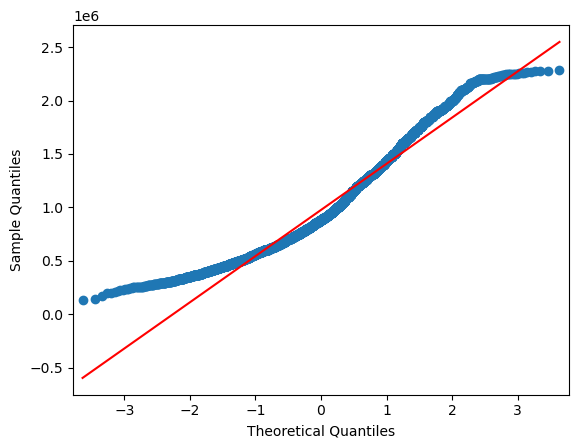

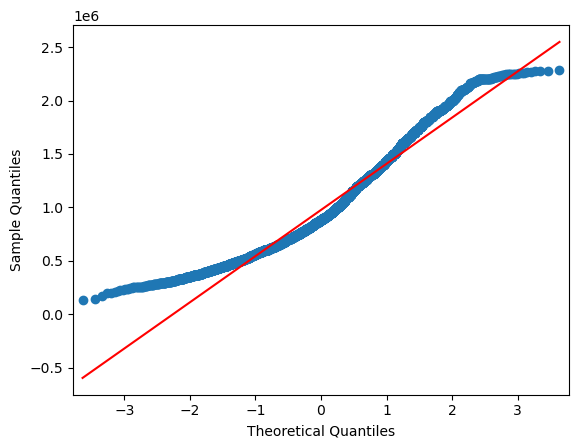

In [87]:
sm.qqplot(melbourne_dataset_no_outliers['Price'], line='s')

<Axes: xlabel='Price'>

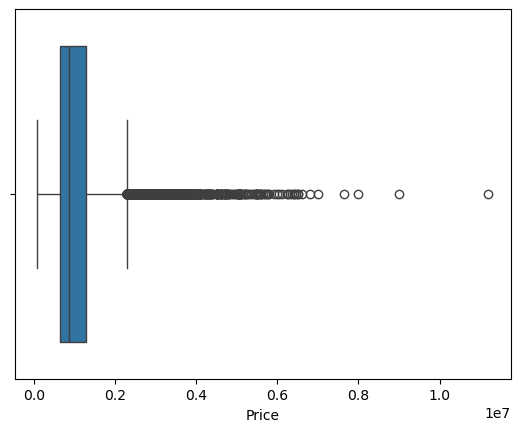

In [88]:
sns.boxplot(x=melbourne_dataset_csv["Price"])

In [91]:
# Calcula skewness y kurtosis
skewness_price = melbourne_dataset_no_outliers['Price'].skew()
kurtosis_price = melbourne_dataset_no_outliers['Price'].kurtosis()

# Imprimir resultados
print(f'Skewness del balance: {skewness_price}')
print(f'Kurtosis del balance: {kurtosis_price}')

# Interpretación de skewness
if skewness_price > 0:
    print('La distribución es positiva (asimetría a la derecha).')
elif skewness_price < 0:
    print('La distribución es negativa (asimetría a la izquierda).')
else:
    print('La distribución es simétrica.')

# Interpretación de kurtosis
if kurtosis_price > 0:
    print('La distribución tiene colas más pesadas que una distribución normal (más outliers).')
elif kurtosis_price < 0:
    print('La distribución tiene colas más ligeras que una distribución normal (menos outliers).')
else:
    print('La distribución tiene la misma cantidad de colas que una distribución normal.')


Skewness del balance: 0.749194817470043
Kurtosis del balance: -0.0479568762228606
La distribución es positiva (asimetría a la derecha).
La distribución tiene colas más ligeras que una distribución normal (menos outliers).


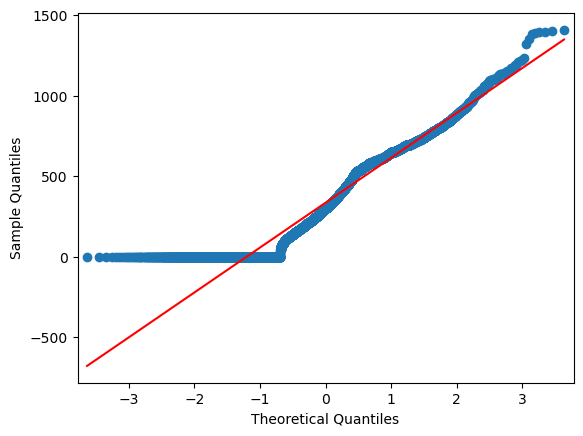

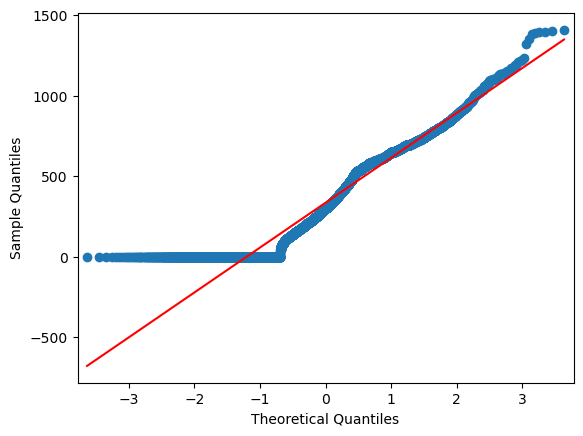

In [100]:
#kolmogorov smirnov test
sm.qqplot(melbourne_dataset_no_outliers['Landsize'], line='s')

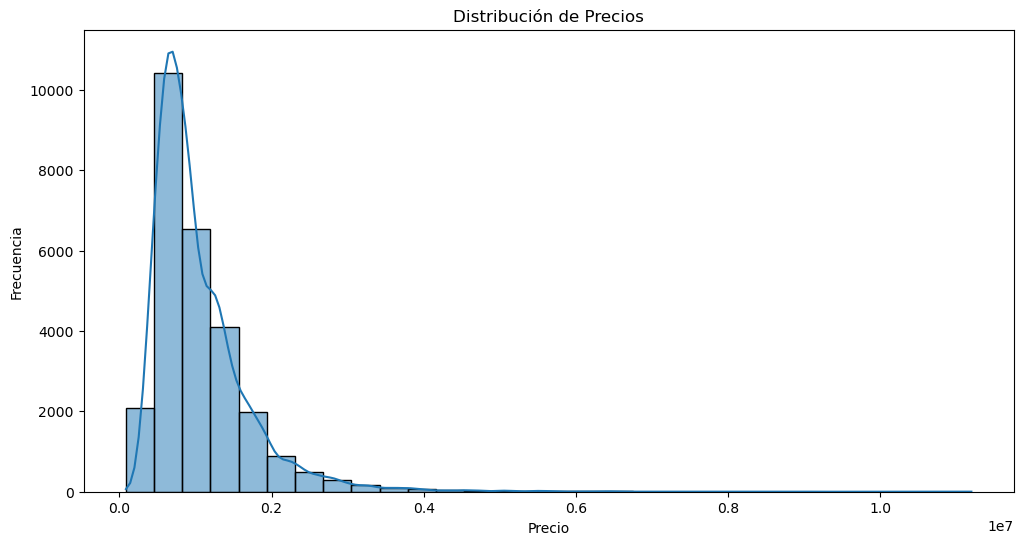

Estadística K-S: nan
Valor p: nan
No se puede rechazar la hipótesis nula: la distribución de precios sigue una distribución normal.


In [105]:
# Seleccionar la columna de precios
precios = melbourne_dataset_csv['Price']

# Visualizar la distribución de precios
plt.figure(figsize=(12, 6))
sns.histplot(precios, bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Realizar el test de Kolmogorov-Smirnov
# Comparar con una distribución normal
media = np.mean(precios)
desviacion_estandar = np.std(precios)

# Calcular la distribución normal
normal = stats.norm(loc=media, scale=desviacion_estandar)

# Realizar el test
ks_statistic, p_value = stats.kstest(precios, normal.cdf)

# Imprimir los resultados
print(f'Estadística K-S: {ks_statistic}')
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: la distribución de precios no sigue una distribución normal.")
else:
    print("No se puede rechazar la hipótesis nula: la distribución de precios sigue una distribución normal.")


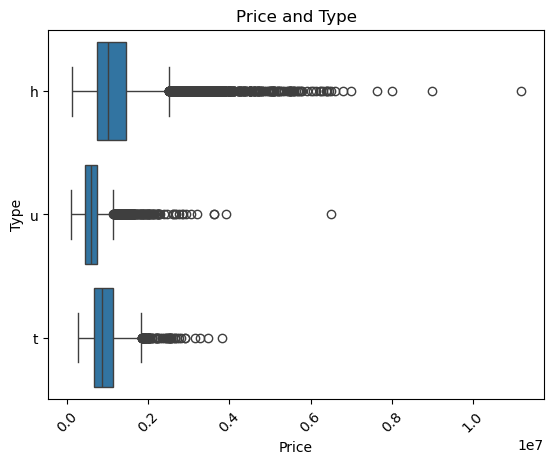

In [106]:
#boxplot con precios y type
sns.boxplot(x=melbourne_dataset_csv["Price"], y=melbourne_dataset_csv["Type"])
plt.title('Price and Type')
plt.xlabel('Price')
plt.ylabel('Type')
plt.xticks(rotation=45)  # Rota las etiquetas si son largas
plt.show()


In [109]:
#calculate average and medium price by Regionname in boxplot and scatter plot Agrupar por 'Regionname' y calcular el precio máximo y mínimo
precio_medio = melbourne_dataset_csv.groupby('Regionname')['Price'].mean().reset_index()

# Encontrar la región con el precio medio más alto y más bajo
region_media_maxima = precio_medio.loc[precio_medio['Price'].idxmax()]
region_media_minima = precio_medio.loc[precio_medio['Price'].idxmin()]

# Imprimir los resultados
print(f"La región con el precio medio más alto es {region_media_maxima['Regionname']} con un precio medio de {region_media_maxima['Price']:.2f}.")
print(f"La región con el precio medio más bajo es {region_media_minima['Regionname']} con un precio medio de {region_media_minima['Price']:.2f}.")




La región con el precio medio más alto es Southern Metropolitan con un precio medio de 1395928.33.
La región con el precio medio más bajo es Western Victoria con un precio medio de 432606.77.


In [112]:
#tests chi square  
contingency_table = pd.crosstab(melbourne_dataset_csv['Regionname'], melbourne_dataset_csv['Price'])
# Realizar el Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados del Chi-Square Test
print(f'Estadística Chi-Square: {chi2_stat}')
print(f'Valor p: {p_value}')
print(f'Grados de libertad: {dof}')
print('Tabla de frecuencias esperadas:')
print(expected)


Estadística Chi-Square: 25658.719637573868
Valor p: 1.804092622742568e-144
Grados de libertad: 20090
Tabla de frecuencias esperadas:
[[0.12009984 0.12009984 0.12009984 ... 0.12009984 0.12009984 0.12009984]
 [0.00609308 0.00609308 0.00609308 ... 0.00609308 0.00609308 0.00609308]
 [0.28865071 0.28865071 0.28865071 ... 0.28865071 0.28865071 0.28865071]
 ...
 [0.31287623 0.31287623 0.31287623 ... 0.31287623 0.31287623 0.31287623]
 [0.21344149 0.21344149 0.21344149 ... 0.21344149 0.21344149 0.21344149]
 [0.00352371 0.00352371 0.00352371 ... 0.00352371 0.00352371 0.00352371]]


In [113]:
# Calcular Cramér's V
n = contingency_table.sum().sum()  # Total de observaciones
phi2 = chi2_stat / n
r, k = contingency_table.shape  # Número de filas y columnas
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

# Imprimir Cramér's V
print(f'Cramér\'s V: {cramers_v}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: hay una relación significativa entre Regionname y Price.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que hay una relación.")

Cramér's V: 0.3668031316595495
Se rechaza la hipótesis nula: hay una relación significativa entre Regionname y Price.
